In [1]:
!pip install librosa

In [ ]:
import librosa
array, sampling_rate = librosa.load(librosa.ex('trumpet'))


In [ ]:
print(type(array)," and ",type(sampling_rate))
print(array)
print(sampling_rate)

<class 'numpy.ndarray'>  and  <class 'int'>
[-1.4068222e-03 -4.4607258e-04 -4.1098078e-04 ...  7.9623051e-06
 -3.0417003e-05  1.2765067e-05]
22050


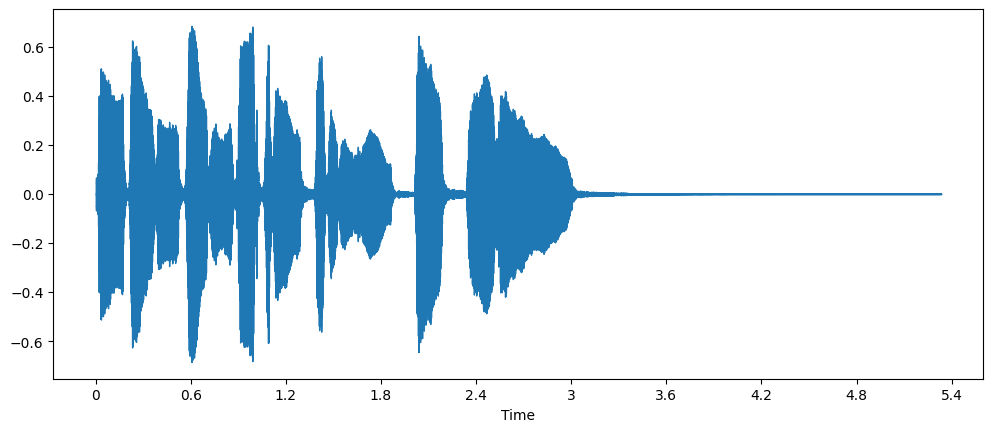

In [ ]:
import matplotlib.pyplot as plt
plt.figure().set_figwidth(12)
librosa.display.waveshow(array,sr = sampling_rate)

In [ ]:
import numpy as np
dft_input = array[:4096]
window = np.hamming(len(dft_input))
window_input = dft_input * window
dft = np.fft.rfft(window_input)

amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref = np.max)

frequency = librosa.fft_frequencies(sr = sampling_rate, n_fft=len(dft_input))


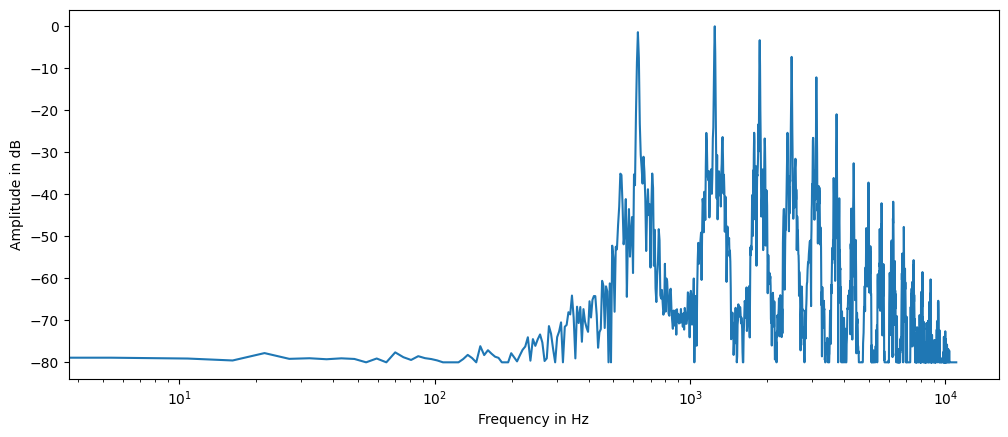

In [ ]:
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude in dB")
plt.xscale("log")

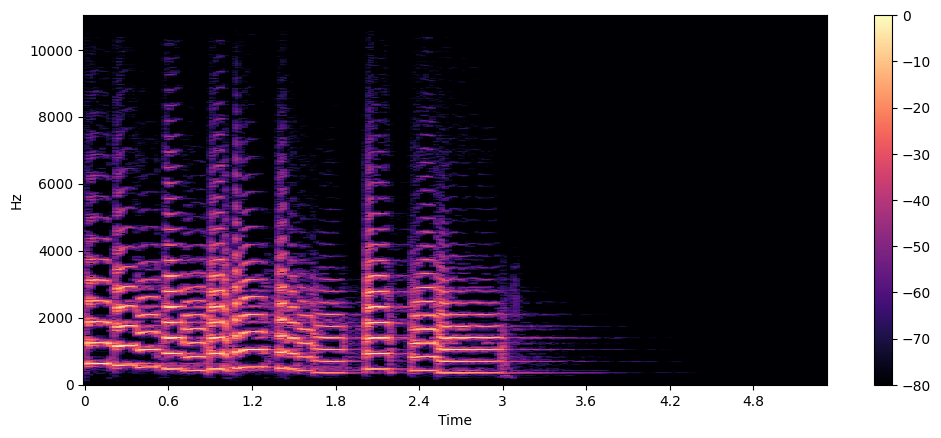

In [ ]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

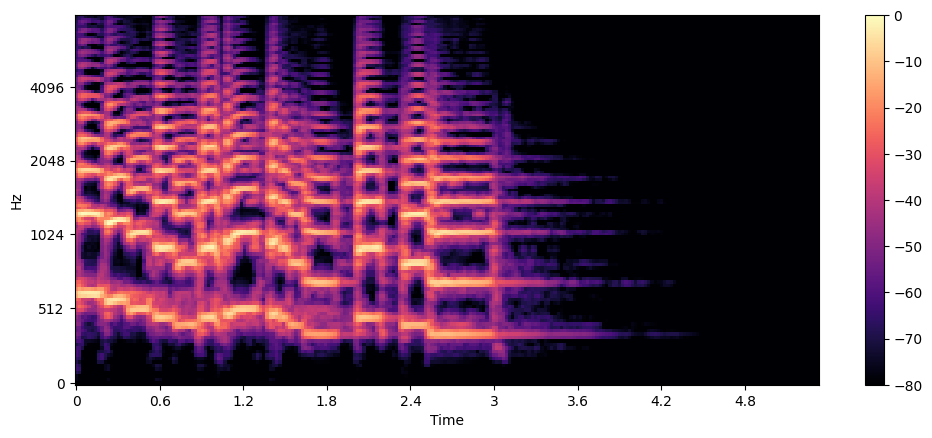

In [ ]:
S = librosa.feature.melspectrogram(y = array, sr = sampling_rate, n_mels = 128, fmax = 8000)
S_dB = librosa.power_to_db(S, ref = np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis ="time", y_axis = "mel", sr = sampling_rate, fmax = 8000)
plt.colorbar()

##Unit 2. A gentle introduction to audio applications

In [ ]:
# 1️⃣  Fix the original HF-datasets issue (needs ≥2.14.6) and keep GCS happy
!pip install -Uq "datasets>=2.14.6" "fsspec==2025.3.2" "gcsfs==2025.3.2"

# 2️⃣  Re-pin PyTorch’s CUDA-12.4 runtime pieces
!pip install -Uq --force-reinstall \
  torch==2.6.0+cu124 torchvision==0.19.0+cu124 torchaudio==2.6.0+cu124 \
  --index-url https://download.pytorch.org/whl/cu124

# (If you don’t need a GPU, swap the second command for the CPU build:
# pip install -Uq torch==2.6.0+cpu torchvision==0.19.0+cpu torchaudio==2.6.0+cpu)

# 3️⃣  Restart the kernel so the linker sees the right shared libs
import os, sys, IPython, json, time, psutil; os._exit(0)


ERROR: Cannot install datasets==2.14.6, datasets==2.14.7, datasets==2.15.0, datasets==2.16.0, datasets==2.16.1, datasets==2.17.0, datasets==2.17.1, datasets==2.18.0, datasets==2.19.0, datasets==2.19.1, datasets==2.19.2, datasets==2.20.0, datasets==2.21.0, datasets==3.0.0, datasets==3.0.1, datasets==3.0.2, datasets==3.1.0, datasets==3.2.0, datasets==3.3.0, datasets==3.3.1, datasets==3.3.2, datasets==3.4.0, datasets==3.4.1, datasets==3.5.0, datasets==3.5.1, datasets==3.6.0, fsspec==2025.3.2 and gcsfs==2025.3.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from datasets import Audio, load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16000))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

minds14.py:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

In [3]:
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [2]:
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

config.json:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

Device set to use cpu


In [4]:
example = minds[0]
classifier(example["audio"]["array"])

[{'score': 0.962530791759491, 'label': 'pay_bill'},
 {'score': 0.028673000633716583, 'label': 'freeze'},
 {'score': 0.003349815495312214, 'label': 'card_issues'},
 {'score': 0.0020058127120137215, 'label': 'abroad'},
 {'score': 0.0008484353311359882, 'label': 'high_value_payment'},
 {'score': 0.0007367967627942562, 'label': 'direct_debit'},
 {'score': 0.000405700906412676, 'label': 'latest_transactions'},
 {'score': 0.00033970861113630235, 'label': 'joint_account'},
 {'score': 0.00033128022914752364, 'label': 'address'},
 {'score': 0.0003288657171651721, 'label': 'balance'},
 {'score': 0.00014877572539262474, 'label': 'app_error'},
 {'score': 0.00014772512076888233, 'label': 'atm_limit'},
 {'score': 8.815687033347785e-05, 'label': 'cash_deposit'},
 {'score': 6.512484833365306e-05, 'label': 'business_loan'}]

In [5]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [7]:
from transformers import pipeline
asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cpu


In [8]:
asr(example['audio']['array'])


{'text': 'I WOULD LIKE TO PAY MY ELECTRICITY BILL USING MY CAD CAN YOU PLEASE ASSIST'}

In [9]:
example["english_transcription"]

'I would like to pay my electricity bill using my card can you please assist'

In [6]:
# from transformers import pipeline

# asr = pipeline("automatic-speech-recognition")

'hi'

In [11]:
mindsde = load_dataset("PolyAI/minds14", name = "de-DE", split = "train")
mindsde = mindsde.cast_column("audio", Audio(sampling_rate = 16000))

MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
from transformers import pipeline
asr = pipeline("automatic-speech-recognition", model = "maxidl/wav2vec2-large-xlsr-german")
asr(mindsde[0]['audio']['array'])

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

Device set to use cpu


{'text': 'ich möchte gerne geld auf mein konto einzallen'}

In [14]:
mindsde[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/de-DE~CASH_DEPOSIT/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/de-DE~CASH_DEPOSIT/response_4.wav',
  'array': array([-1.11846020e-07,  9.51066613e-06,  5.26197255e-07, ...,
          3.63070332e-03,  2.57458771e-03,  1.28283468e-03]),
  'sampling_rate': 16000},
 'transcription': 'ich möchte gerne Geld auf mein Konto einzahlen',
 'english_transcription': 'I would like to deposit money into my account',
 'intent_class': 7,
 'lang_id': 1}

TTS

In [1]:
from transformers import pipeline
pipe = pipeline("text-to-speech", model = "suno/bark-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [2]:
text = " Hey, I am lonely, sad, depressed and all in all wanting to kill myself. Although I know I will be better soon, so chill"
output  = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [3]:
output

{'audio': array([[0.00135894, 0.00071531, 0.00082222, ..., 0.00023493, 0.00023465,
         0.00022966]], dtype=float32),
 'sampling_rate': 24000}

In [4]:
from IPython.display import Audio
Audio(output['audio'],rate = output['sampling_rate'])

In [ ]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])

In [8]:
fr_txt = "♪ Je m’appelle Jessica. Je suis une fille, je suis française et j’ai treize ans. Je vais à l’école à Nice, mais j’habite à Cagnes-Sur-Mer ♪"
output_fr = pipe(fr_txt)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [9]:
Audio(output_fr['audio'], rate = output['sampling_rate'])

In [10]:
song = "♪ In the jungle, the mighty jungle, the ladybug was seen. ♪ "
output = pipe(song)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [18]:
music_pipe = pipeline("text-to-audio", model = "facebook/musicgen-small")
text = "90s rock song with electric guitar and heavy drums like Nirvana"
forward_params = {"max_new_tokens": 512}
output_music = music_pipe(text,forward_params = forward_params)
# Audio()

Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summ

In [19]:
output_music

{'audio': array([[[-0.03234404, -0.0340356 , -0.02595476, ..., -0.02441705,
          -0.01913954, -0.0124864 ]]], dtype=float32),
 'sampling_rate': 32000}

In [21]:
Audio(output["audio"][0], rate=output["sampling_rate"])

In [ ]:
music_pipe = pipeline("text-to-audio", model="facebook/musicgen-small")
text = "90s rock song with electric guitar and heavy drums"
forward_params = {"max_new_tokens": 512}

output = music_pipe(text, forward_params=forward_params)
